# Task-2 : INTERMEDIATE LEVEL TASK

### Task 02: Prediction using Decision Tree  Algorithm 
Create the Decision Tree classifier and visualize it graphically. 

The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.  

Watch Tutorial from here https://youtu.be/CBCfOTePVPo

Dataset : https://bit.ly/3kXTdox

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import seaborn as sns
from pandas import plotting
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#Feature Scaling (Scaling using minmaxscaler)
from sklearn.preprocessing import MinMaxScaler

#Regression libraries used in this kernel
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Metrics for regression model performance
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


### Importing Dataset

In [2]:
# Loading iris dataset into the notebook
df = pd.read_csv("D:/Users/Janhavi/LGM/Data Science/Iris.csv")
print("Iris dataset loaded successfully")

Iris dataset loaded successfully


In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.shape 

(150, 6)

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
#dropping the ID column as it is unique
df.drop("Id", axis=1 , inplace=True)

In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Visualizing Data

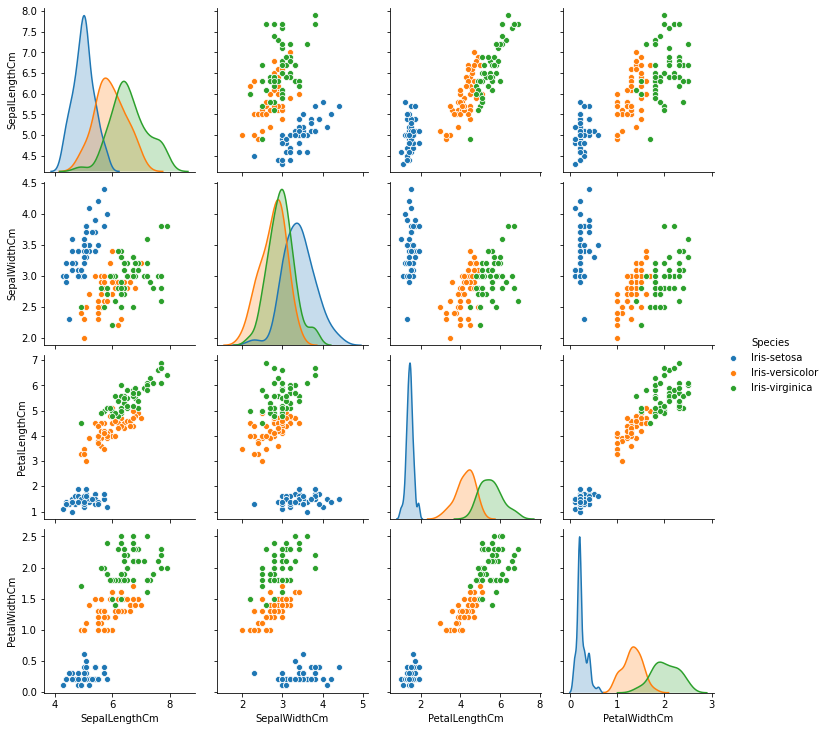

In [13]:
sns.pairplot(df, hue='Species')

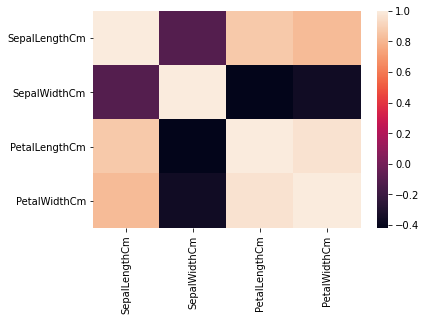

In [14]:
sns.heatmap(df.corr())

### Data preprocessing

In [15]:
target=df['Species']
data=df.copy()
data=data.drop('Species', axis=1)
data.shape

(150, 4)

In [16]:
#defining the attributes and labels
X=df.iloc[:, [0,1,2,3]].values
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
y=df['Species'].values
data.shape

(150, 4)

### Trainig the model
We will now split the data into test and train.

In [17]:
#Extracting independent & dependent variables from dataset
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print('X \n',X)
print('\n y \n',y)

X 
      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]

 y 
 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)
print("Traingin split:",X_train.shape)
print("Testin spllit:",X_test.shape)

Traingin split: (120, 4)
Testin spllit: (30, 4)


### Decision Tree Algorithm

In [19]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0])

### Classification Report and Confusion Matrix

In [20]:
matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix ',matrix)
accuracy1=accuracy_score(y_test,y_pred)
print('Accuracy :' , accuracy1)

Confusion matrix  [[13  0  0]
 [ 0  6  0]
 [ 0  0 11]]
Accuracy : 1.0


In [21]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print("Classification report:\n",cr)


Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [22]:
feature_names = df.columns
print('Feature Names : \n',feature_names)
target_names = target
print('\n Target Names : \n',target_names)


Feature Names : 
 Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

 Target Names : 
 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


In [23]:
class_names=[str(x) for x in model.classes_]
print(model.classes_)
print(str(class_names))

[0 1 2]
['0', '1', '2']


### Visualizing the Decision Tree Created

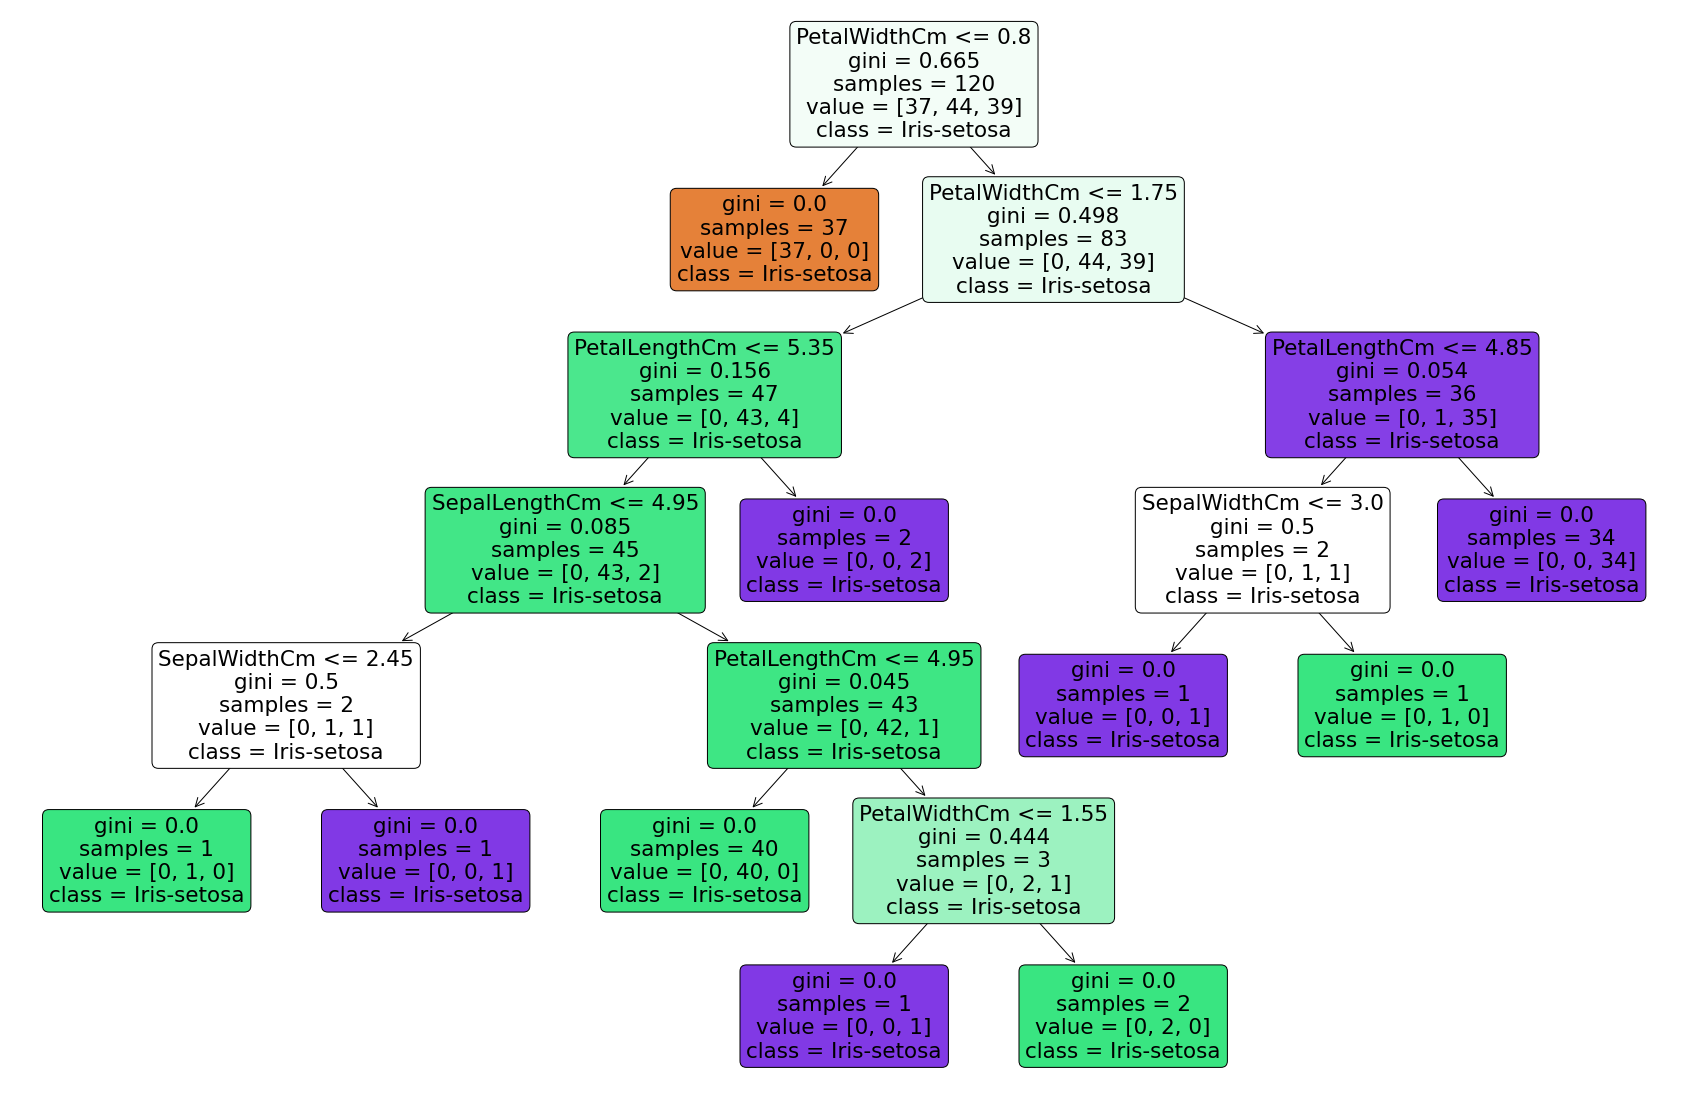

In [24]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(30,20))
plot_tree(model,feature_names=feature_names,class_names=target,filled=True,rounded=True)
plt.savefig('iris-dataset_tree_visualization.png')
